# 🌸**Multiclass Classfication using SVM**🌸

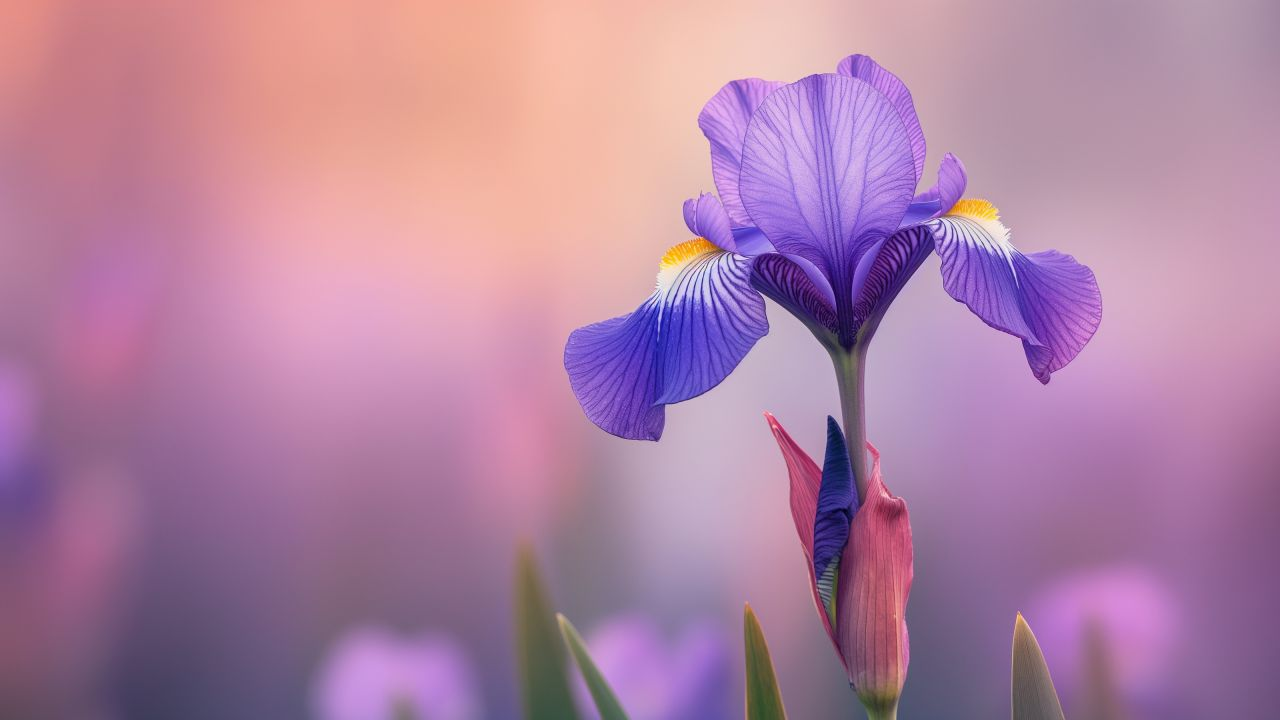

# 1. Install R kernel

In [1]:
!apt-get install -y r-base
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev
!R -e "install.packages('IRkernel')"
!R -e "IRkernel::installspec(user = FALSE)"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.18).
libssl-dev is already the newest version (3.0.2-0ubuntu1.18).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many

# 2. Installing packages

In [3]:
install.packages(c("e1071", "caret", "ggplot2", "dplyr", "tibble", "corrplot", "plotly", "caret", "pROC","pheatmap"))
library(e1071)        # For SVM
library(caret)        # For data preparation, model evaluation
library(ggplot2)      # For visualizations
library(dplyr)        # Data manipulation
library(tibble)       # For tibble data frame format
library(corrplot)     # For correlation plots
library(plotly)       # For interactive plots
library(pROC)         # For ROC curve evaluation
library(pheatmap)     # For ROC plots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




# 3. Load the data -> IRIS DATASET

In [61]:
# Load and show the first few rows of the dataset
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


# 4. Exploratory Data Analysis

In [62]:
# Summary of data
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [63]:
# Check class distribution for imbalance
print(table(trainData$Species))  # Prints the frequency of each class
print(prop.table(table(trainData$Species)))  # Prints class proportions


    setosa versicolor  virginica 
        35         35         35 

    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 


In [66]:
# Check for Outliers using IQR Method
numeric_features <- iris[, 1:4]

# Function to find outliers using IQR method
find_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  outliers <- which(x < (Q1 - 1.5 * IQR) | x > (Q3 + 1.5 * IQR))
  return(outliers)
}

# Check for outliers in each numeric column
outliers_list <- lapply(numeric_features, find_outliers)

# Print outliers for each column
print(outliers_list)

$Sepal.Length
integer(0)

$Sepal.Width
[1] 16 33 34 61

$Petal.Length
integer(0)

$Petal.Width
integer(0)



In [73]:
# Replace outliers with the median value
outlier_indices <- c(16, 33, 34, 61)
iris$Sepal.Width[outlier_indices] <- median(iris$Sepal.Width, na.rm = TRUE)

# 5. Data Visualisation

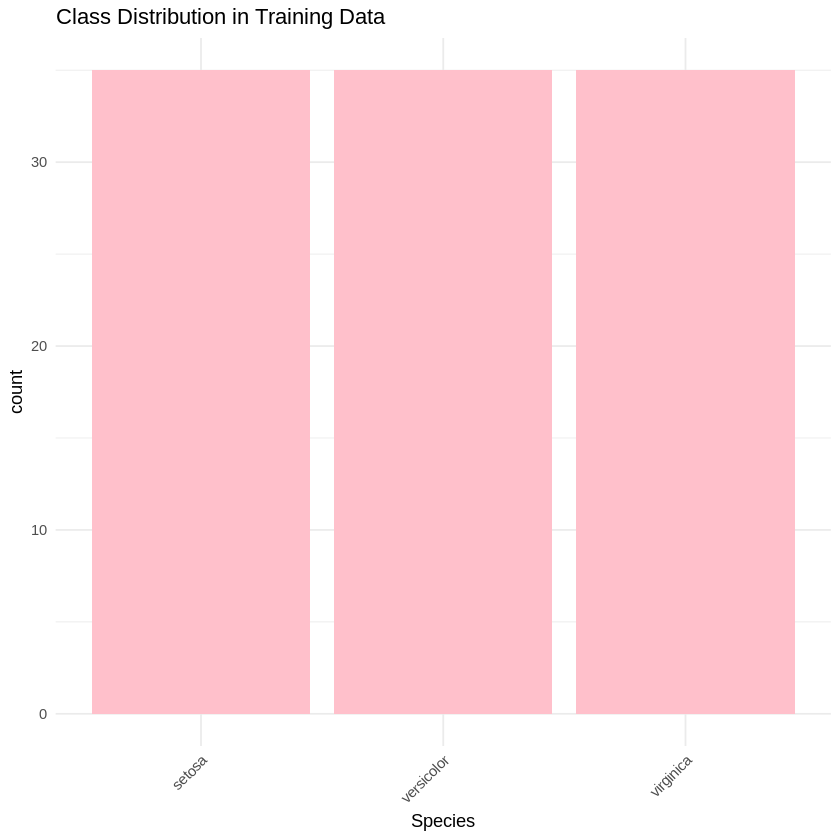

In [65]:
# Visualize class imbalance
ggplot(trainData, aes(x = Species)) +
  geom_bar(fill = "pink") +
  theme_minimal() +
  ggtitle("Class Distribution in Training Data") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

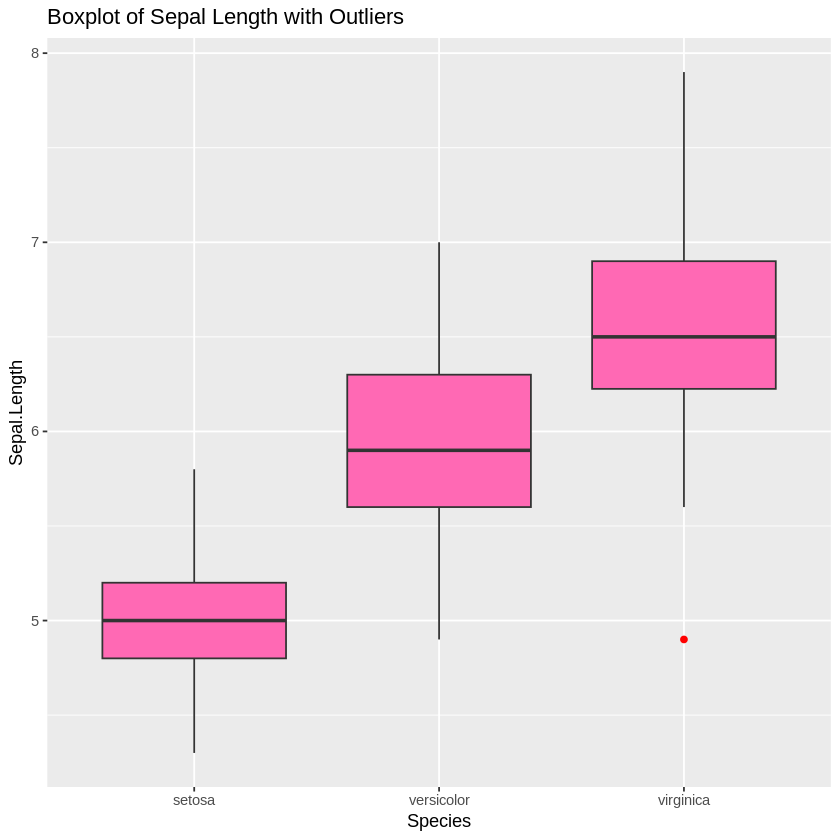

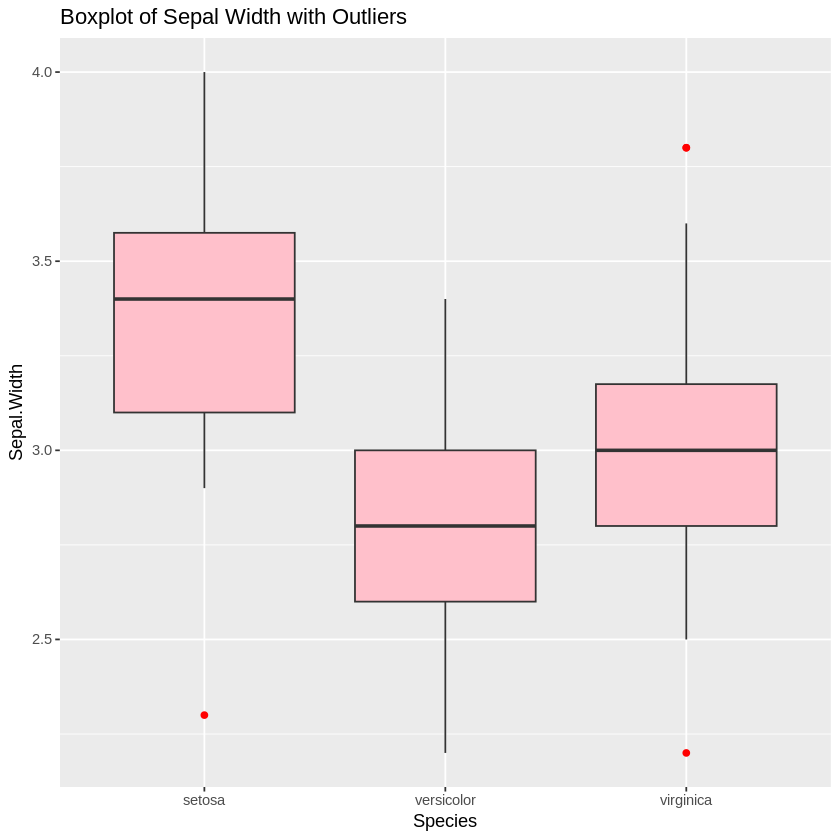

In [89]:
# Visualize outliers
ggplot(iris, aes(x = Species, y = Sepal.Length)) +
  geom_boxplot(outlier.colour = "red", fill = "hotpink") +
  ggtitle("Boxplot of Sepal Length with Outliers")

ggplot(iris, aes(x = Species, y = Sepal.Width)) +
  geom_boxplot(outlier.colour = "red", fill = "pink") +
  ggtitle("Boxplot of Sepal Width with Outliers")

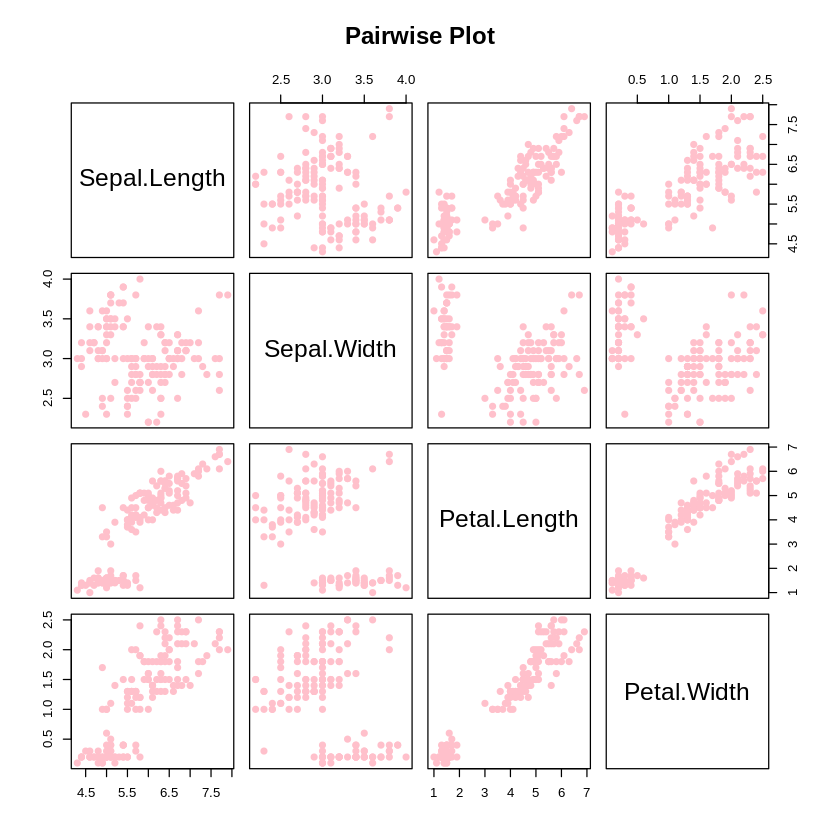

In [90]:
# Visualize Pairwise Plot
pairs(iris[1:4], col = "pink", pch = 19, main = "Pairwise Plot")

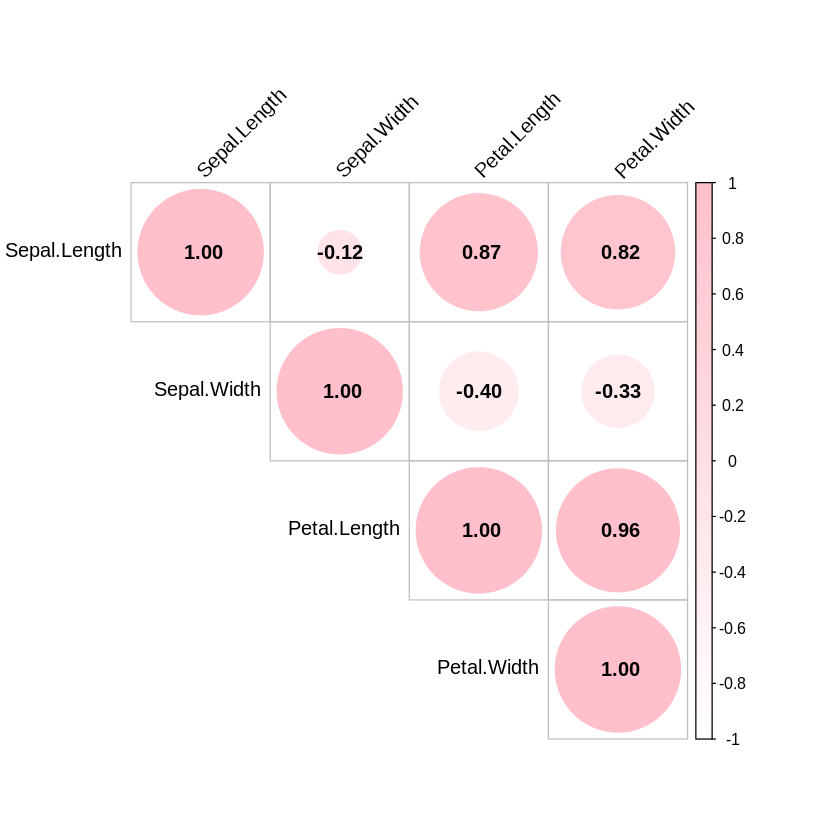

In [75]:
# Calculate the correlation matrix for the first four numeric columns of iris
cor_matrix <- cor(iris[1:4])

# Increase the top margin further to make space for the title
par(mar = c(5, 4, 8, 2))  # Increase the top margin to 8

# Suppress warnings and create the correlation heatmap
suppressWarnings(
  corrplot(cor_matrix,
           method = "circle",            # Use circles for the plot
           type = "upper",               # Plot only the upper triangle of the matrix
           col = colorRampPalette(c("white", "pink"))(200),  # Pink gradient palette
           addCoef.col = "black",        # Optionally add correlation coefficients in black
           tl.col = "black",             # Set the color of the text labels
           tl.srt = 45)                  # Rotate the text labels for better readability
)

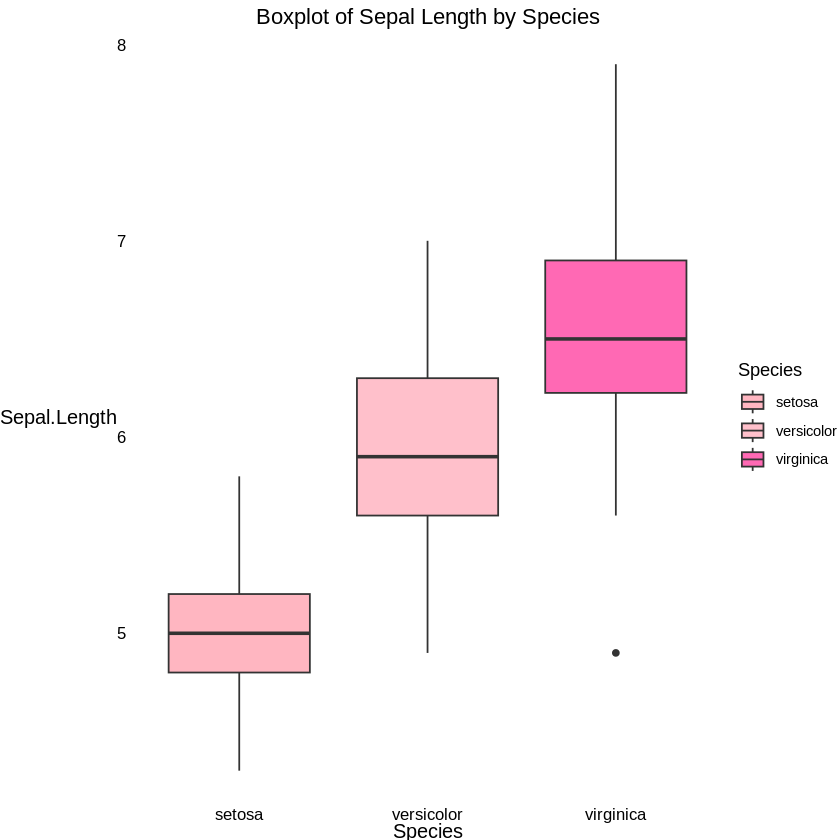

In [76]:
# Boxplot to visualize distribution of features across species
ggplot(iris, aes(x = Species, y = Sepal.Length, fill = Species)) +
  geom_boxplot() +
  scale_fill_manual(values = c("setosa" = "lightpink",
                               "versicolor" = "pink",
                               "virginica" = "hotpink")) +
  theme_void() +  # Minimal theme with a white background
  ggtitle("Boxplot of Sepal Length by Species") +
  theme(
    plot.title = element_text(hjust = 0.5), # Center the title
    axis.title = element_text(size = 12),   # Adjust axis titles size
    axis.text = element_text(size = 10)     # Adjust axis text size
  )

# 6. Data Processing

In [77]:
# Check for missing values
sum(is.na(iris))

# Normalize the numeric features (important for SVM)
pre_proc <- preProcess(iris[1:4], method = "range")
iris_norm <- predict(pre_proc, iris[1:4])
iris_norm <- cbind(iris_norm, Species = iris$Species)

[1] 0

In [78]:
# Train-Test Split
set.seed(42)
trainIndex <- createDataPartition(iris_norm$Species, p = 0.7, list = FALSE)
trainData <- iris_norm[trainIndex,]
testData <- iris_norm[-trainIndex,]

# 7. Model Building

In [79]:
# Model Building: SVM (with probability = TRUE)
svm_model <- svm(Species ~ ., data = trainData, kernel = "radial", cost = 1, gamma = 0.5, probability = TRUE)

# Model Summary
summary(svm_model)


Call:
svm(formula = Species ~ ., data = trainData, kernel = "radial", cost = 1, 
    gamma = 0.5, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  44

 ( 7 16 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




# 8. Fine Tuning the model

In [80]:
# Hyperparameter Tuning (using cross-validation, with probability = TRUE)
tune_results <- tune(svm, Species ~ ., data = trainData,
                     ranges = list(cost = 10^(-1:2), gamma = c(0.1, 0.5, 1, 2)),
                     probability = TRUE)  # Ensure probability = TRUE during tuning
best_svm_model <- tune_results$best.model

# Best model summary
summary(best_svm_model)


Call:
best.tune(METHOD = svm, train.x = Species ~ ., data = trainData, 
    ranges = list(cost = 10^(-1:2), gamma = c(0.1, 0.5, 1, 2)), probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  22

 ( 6 7 9 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




# 9. Predictions

In [81]:
# Predictions (with probability = TRUE)
predictions <- predict(best_svm_model, testData[1:4], probability = TRUE)

# Extract probabilities
probabilities <- attr(predictions, "probabilities")

# Check the probabilities
print(probabilities)

         setosa  versicolor   virginica
6   0.950253052 0.031462610 0.018284339
9   0.905948074 0.072633274 0.021418652
14  0.948803336 0.033365269 0.017831395
16  0.887887365 0.087000483 0.025112151
17  0.961203445 0.022845184 0.015951371
19  0.955567595 0.027594705 0.016837700
21  0.963577095 0.024152390 0.012270515
22  0.964410339 0.021848326 0.013741335
23  0.977186421 0.010989875 0.011823705
29  0.973840692 0.015917176 0.010242132
33  0.943704737 0.041282159 0.015013103
35  0.947646012 0.038425412 0.013928576
39  0.935095761 0.046819413 0.018084826
42  0.610082657 0.335559483 0.054357859
43  0.957517682 0.027672825 0.014809492
51  0.049400937 0.900720083 0.049878980
57  0.022562444 0.930125828 0.047311728
58  0.033146748 0.959389396 0.007463856
63  0.034420028 0.958990994 0.006588978
65  0.017863691 0.975119479 0.007016829
69  0.021523605 0.970224679 0.008251716
77  0.020853649 0.801031294 0.178115057
78  0.015073149 0.318660088 0.666266764
80  0.028698645 0.964532789 0.006768566


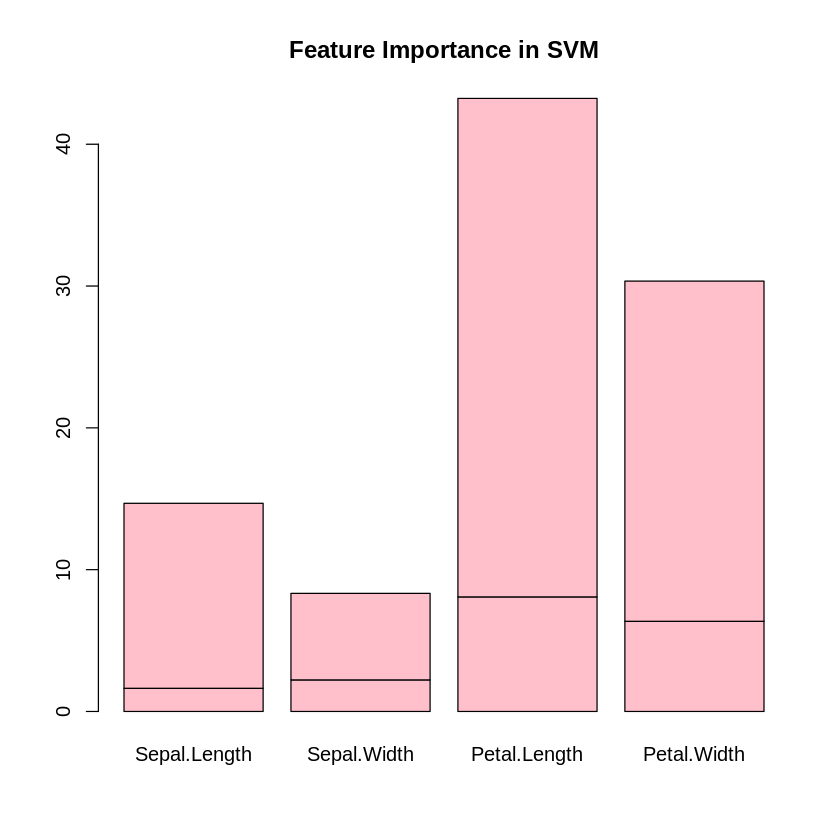

In [87]:
# Feature Importance (Optional)
svm_importance <- abs(t(best_svm_model$coefs) %*% best_svm_model$SV)
barplot(svm_importance, names.arg = colnames(iris[1:4]), main = "Feature Importance in SVM", col = "pink")

# 10. Confusion Matrix and Results

In [82]:
# Confusion Matrix + Accuracy Score
conf_matrix <- confusionMatrix(predictions, testData$Species)
print(conf_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

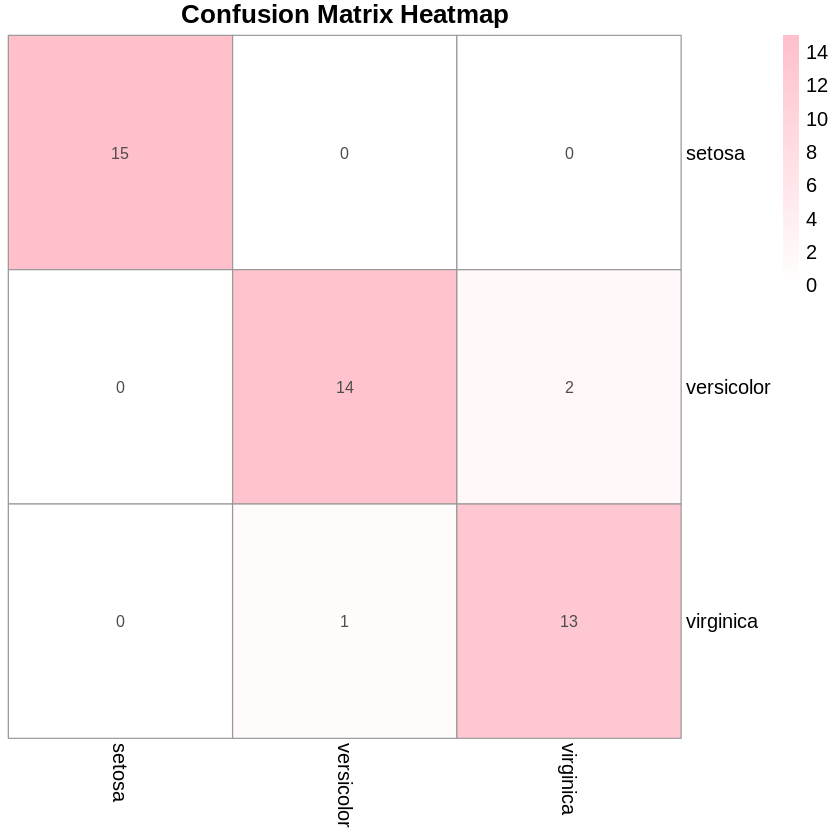

In [91]:
# Convert the confusion matrix into a table
cm_table <- conf_matrix$table

# Check the structure to ensure it's 3x3
#print(cm_table)

# Plot the confusion matrix using pheatmap
pheatmap(cm_table,
         color = colorRampPalette(c("white", "pink"))(50),  # Color gradient from white to blue
         display_numbers = TRUE,  # Display counts on the heatmap
         number_format = "%.0f",  # Format of the numbers
         main = "Confusion Matrix Heatmap",  # Title
         cluster_rows = FALSE,  # No clustering of rows
         cluster_cols = FALSE,  # No clustering of columns
         fontsize = 12)  # Font size for the numbers